In [1]:
from pathlib import Path
from analysis import PyRatGame, pyrat_multiruns, comparison_plot

# Simple runs

First, we can run a PyRat game from python using a `PyRatGame` instance, which
accepts the same arguments as the command line interface `pyrat.py`.

The only difference is that a `PyRatGame` instance will be created with
`--synchronous` and `--nodrawing` set to `True` by default, so experiments run
faster.

In [2]:
pyrat = PyRatGame(
    rat=Path("AIs", "solutions", "lab3_bfs_dfs.py"),
    pieces=1,
    mud_density=0.0,
    tests=5,
)

csv_path, stats = pyrat.run()
stats

,win_rat,win_python,score_rat,score_python,moves_rat,moves_python,miss_rat,miss_python,stucks_rat,stucks_python,prep_time_rat,prep_time_python,turn_time_rat,turn_time_python
0,1,0,1,0,31,0,0,31,0,0,0.001059,7.152557e-07,7.152557e-07,3.768552e-07
1,1,0,1,0,31,0,0,31,0,0,0.001013,1.478195e-05,7.075648e-07,3.999279e-07
2,1,0,1,0,29,0,0,29,0,0,0.001014,2.408028e-05,9.783383e-07,5.672718e-07
3,1,0,1,0,31,0,0,31,0,0,0.000990,2.622604e-05,1.138256e-06,4.691462e-07
4,1,0,1,0,31,0,0,31,0,0,0.001511,2.837181e-05,9.536743e-07,4.537644e-07


In [3]:
stats.mean()

win_rat             1.000000e+00
win_python          0.000000e+00
score_rat           1.000000e+00
score_python        0.000000e+00
moves_rat           3.060000e+01
moves_python        0.000000e+00
miss_rat            0.000000e+00
miss_python         3.060000e+01
stucks_rat          0.000000e+00
stucks_python       0.000000e+00
prep_time_rat       1.117420e-03
prep_time_python    1.883507e-05
turn_time_rat       8.986179e-07
turn_time_python    4.533931e-07
dtype: float64

The `pyrat.run()` method returns a path to a csv file and a `pandas.DataFrame` object.

You can continue the analysis:

- in Excel using the csv file
- in python (`pandas`) using the returned dataframe

To run another experiment, you can reuse the same `PyRatGame` instance and change some of its parameters:

In [4]:
pyrat.mud_density = 0.6  # We can observe more "stucks_rat"
# pyrat.kwargs["mud_density"] = 0.6  # equivalent

csv_path, stats = pyrat.run()
stats

,win_rat,win_python,score_rat,score_python,moves_rat,moves_python,miss_rat,miss_python,stucks_rat,stucks_python,prep_time_rat,prep_time_python,turn_time_rat,turn_time_python
0,1,0,1,0,33,0,0,115,82,0,0.001679,9.536743e-07,6.935813e-07,3.109808e-07
1,1,0,1,0,41,0,0,152,111,0,0.002055,2.527237e-05,8.897084e-07,4.219381e-07
2,1,0,1,0,31,0,0,112,81,0,0.002439,1.931190e-05,1.015202e-06,3.831727e-07
3,1,0,1,0,29,0,0,85,56,0,0.001019,1.192093e-05,9.454530e-07,4.263485e-07
4,1,0,1,0,31,0,0,148,117,0,0.002386,2.813339e-05,9.690562e-07,3.979013e-07


# Multiple runs

You may want to run a large number of experiments, in order to plot the complexity of an algorithm with regard to the size of the maze for example.

For that usage the `pyrat_multiruns` function can be used.

In [5]:
pyrat_multiruns?

The `pyrat_multiruns` function allows to define some fixed parameters, shared by
all runs, and some grid parameters, from which all possible combinations will be
taken.

If multiple tests were performed for a single game (e.g. `--tests=10`) then only
the mean values are used in the synthesis dataframe.

In [6]:
# Define shared parameters
fixed_params = {
    "pieces": 1,
    "density": 0.4,
    "tests": 10,  # Increase to have a better estimation of performances
}

# Define parameters that will vary
grid_params = {
    "rat": [
        Path("AIs", "solutions", "lab3_bfs_dfs.py"),
        Path("AIs", "solutions", "lab4_dijkstra.py"),
    ],
    "width": [5, 7, 9, 11, 13],
    "mud_density": [0.0, 0.2, 0.4, 0.6],
}

# Run experiments
stats = pyrat_multiruns(
    fixed_params=fixed_params,
    grid_params=grid_params,
    link_height_width=True,
)

stats.head(20)

win_rat  win_python  score_rat  score_python  \
rat          width mud_density                                                 
lab3_bfs_dfs 5     0.0              1.0         0.0        1.0           0.0   
                   0.2              1.0         0.0        1.0           0.0   
                   0.4              1.0         0.0        1.0           0.0   
                   0.6              1.0         0.0        1.0           0.0   
             7     0.0              1.0         0.0        1.0           0.0   
                   0.2              1.0         0.0        1.0           0.0   
                   0.4              1.0         0.0        1.0           0.0   
                   0.6              1.0         0.0        1.0           0.0   
             9     0.0              1.0         0.0        1.0           0.0   
                   0.2              1.0         0.0        1.0           0.0   
                   0.4              1.0         0.0        1.0           0.0   
                   0.6              1.0         0.0        1.0           0.0   
             11    0.0              1.0         0.0        1.0           0.0   
                   0.2              1.0         0.0        1.0           0.0   
                   0.4              1.0         0.0        1.0           0.0   
                   0.6              1.0         0.0        1.0           0.0   
             13    0.0              1.0         0.0        1.0           0.0   
                   0.2              1.0         0.0        1.0           0.0   
                   0.4              1.0         0.0        1.0           0.0   
                   0.6              1.0         0.0        1.0           0.0   

                                moves_rat  moves_python  miss_rat  \
rat          width mud_density                                      
lab3_bfs_dfs 5     0.0                4.6           0.0       0.0   
                   0.2                4.6           0.0       0.0   
                   0.4                5.0           0.0       0.0   
                   0.6                4.2           0.0       0.0   
             7     0.0                6.4           0.0       0.0   
                   0.2                7.4           0.0       0.0   
                   0.4                7.4           0.0       0.0   
                   0.6                6.6           0.0       0.0   
             9     0.0                9.4           0.0       0.0   
                   0.2                9.8           0.0       0.0   
                   0.4                8.4           0.0       0.0   
                   0.6               10.6           0.0       0.0   
             11    0.0               11.8           0.0       0.0   
                   0.2               10.2           0.0       0.0   
                   0.4               12.0           0.0       0.0   
                   0.6               10.6           0.0       0.0   
             13    0.0               13.4           0.0       0.0   
                   0.2               14.8           0.0       0.0   
                   0.4               13.2           0.0       0.0   
                   0.6               15.2           0.0       0.0   

                                miss_python  stucks_rat  stucks_python  \
rat          width mud_density                                           
lab3_bfs_dfs 5     0.0                  4.6         0.0            0.0   
                   0.2                  8.9         4.3            0.0   
                   0.4                 14.7         9.7            0.0   
                   0.6                 15.0        10.8            0.0   
             7     0.0                  6.4         0.0            0.0   
                   0.2                 16.9         9.5            0.0   
                   0.4                 27.7        20.3            0.0   
                   0.6                 25.6        19.0            0.0   
            

Let's just change the "width" into a "size" by squaring it, as the maze was ensured squared due to the `link_height_width=True` argument.

In [7]:
stats.index = stats.index.set_levels(
    stats.index.levels[stats.index.names.index("width")] ** 2, level="width"
)
stats.index = stats.index.rename("size", level="width")

In [8]:
# Save as a DataFrame
# stats.to_csv("my_experiment.csv")

Here again, you can proceed with an analysis into Excel, by saving the returned dataframe as a csv file, or by using the dedicated function `comparison_plot`:

In [9]:
comparison_plot?

You can easily make different plots, just don't forget to declare all but 1 of
the parameters used as `params_grid` in `pyrat_multiruns` to construct the
`stats` dataframe.

For example here we used the following parameters in `params_grid`:

- `rat`
- `width` (renamed `size`)
- `mud_density`.

We can declare `lines=size`, so we have one line for each size of the graph.

It remains `mud_density` and `rat`, so one of them need to be fixed as a keyword argument, e.g. `rat="lab4_dijkstra"`.

The last one is `mud_density`, it will be used as an x axis to plot the `variable="prep_time_rat"` against.

<AxesSubplot: title={'center': "{'size': 81}"}, xlabel='mud_density', ylabel='stucks_rat'>

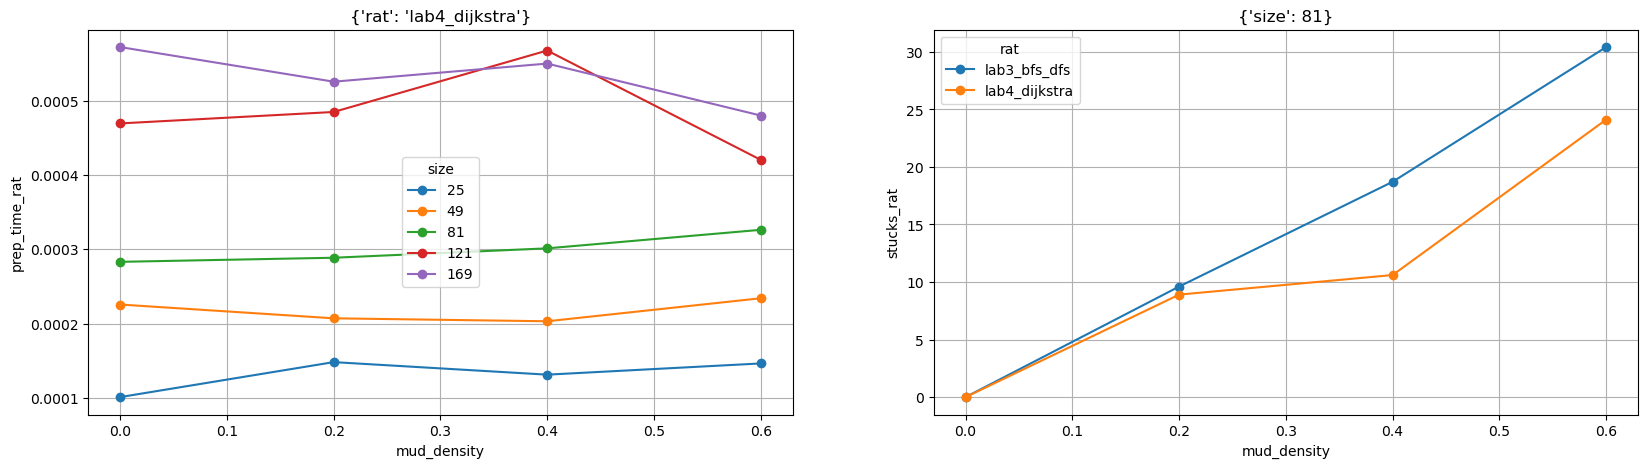

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

# Useless comparison
comparison_plot(
    stats,
    variable="prep_time_rat",
    lines="size",
    rat="lab4_dijkstra",
    ax=axes[0],
)

# Check that dijkstra get less stuck than BFS
comparison_plot(
    stats,
    variable="stucks_rat",
    lines="rat",
    size=81,
    ax=axes[1],
)

Here we compare the `prep_time_rat` for various algorithms, wrt to the `size`/`mud_density` when the `mud_density`/`size` is set to a given value:

<AxesSubplot: title={'center': "{'size': 169}"}, xlabel='mud_density', ylabel='prep_time_rat'>

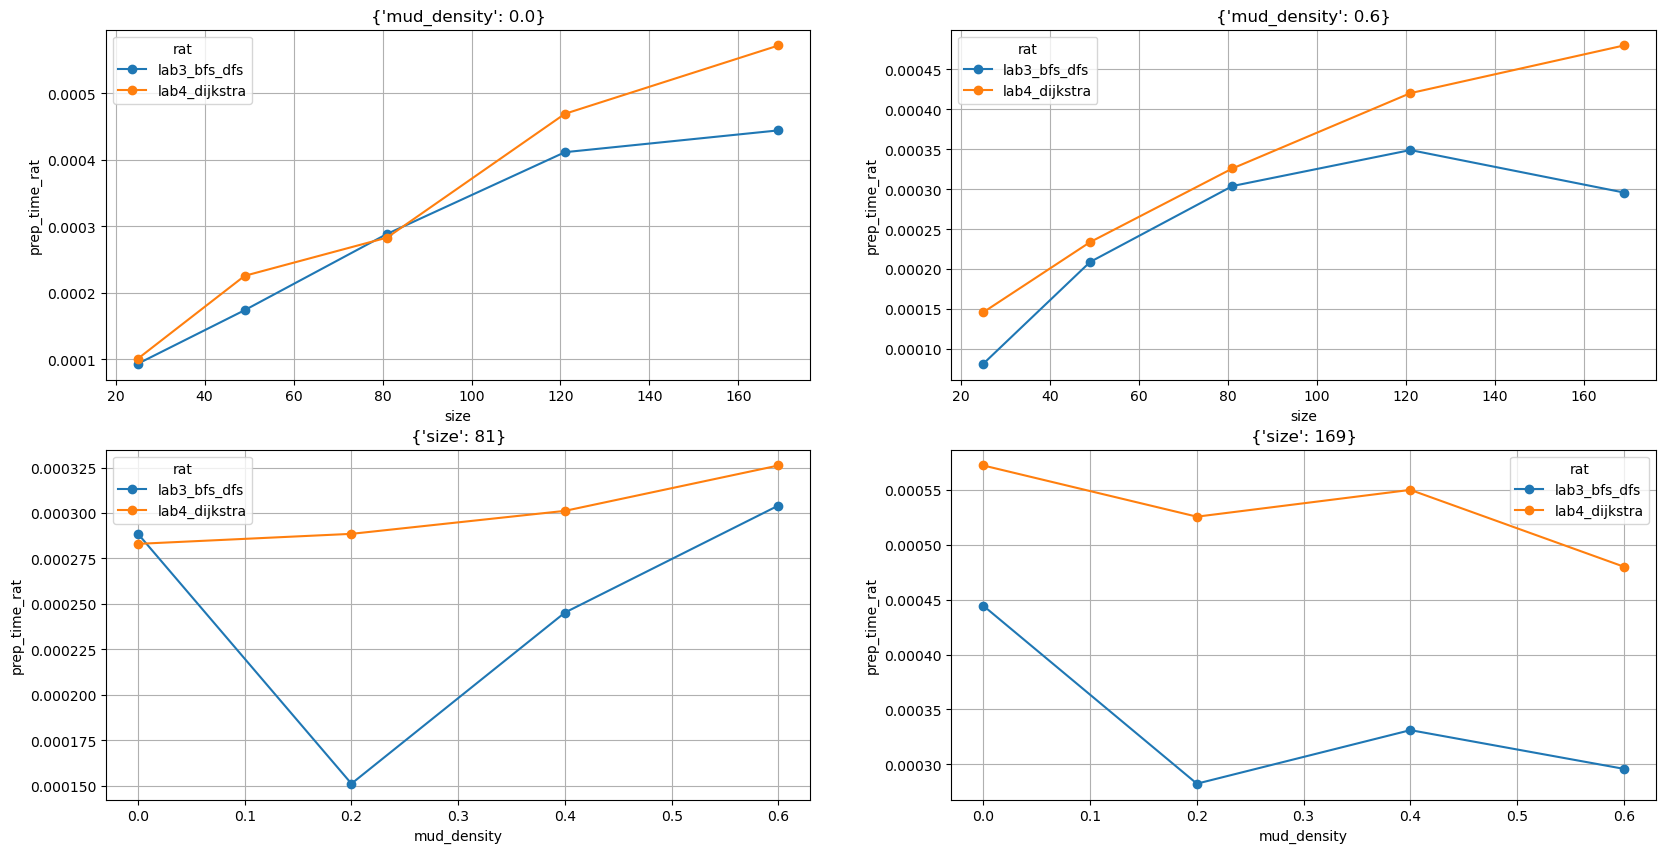

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

variable = "prep_time_rat"
lines = "rat"

# Compare with "mud_density" fixed
comparison_plot(stats, variable=variable, lines=lines, mud_density=0.0, ax=axes[0, 0])
comparison_plot(stats, variable=variable, lines=lines, mud_density=0.6, ax=axes[0, 1])

# Compare with "size" fixed
comparison_plot(stats, variable=variable, lines=lines, size=81, ax=axes[1, 0])
comparison_plot(stats, variable=variable, lines=lines, size=169, ax=axes[1, 1])